In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import joblib

In [ ]:
df0 = pd.read_csv('train_essays.csv')
df0

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [ ]:
df1 = pd.read_csv('train_drcat_04.csv')
df1

,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0
...,...,...,...,...,...,...
44201,F7341069C4A4,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,NaN,7
44202,AFE6E553DAC2,I believe that using this technology could be ...,0,persuade_corpus,NaN,8
44203,falcon_180b_v1_600,The Face on Mars is a fascinating phenomenon t...,1,falcon_180b_v1,You have read the article 'Unmasking the Face ...,3
44204,A5F84C104693,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,NaN,1


In [ ]:
df2 = pd.read_csv('argugpt.csv')
df2

,id,prompt_id,prompt,text,model,temperature,exam_type,score,score_level
0,weccl_30,WECCL-17,Some people think the university education is ...,There are many people who think that universit...,text-babbage-001,0.50,weccl,19,high
1,weccl_51,WECCL-17,Some people think the university education is ...,There are a number of reasons why people might...,text-babbage-001,0.65,weccl,13,medium
2,weccl_48,WECCL-17,Some people think the university education is ...,There are many reasons why university educatio...,text-babbage-001,0.65,weccl,13,medium
3,weccl_50,WECCL-17,Some people think the university education is ...,There are many people who think that universit...,text-babbage-001,0.65,weccl,12,low
4,weccl_55,WECCL-17,Some people think the university education is ...,There is a general consensus that university e...,text-babbage-001,0.80,weccl,13,medium
...,...,...,...,...,...,...,...,...,...
4033,gre_514,GRE-603,Only by being forced to defend an idea against...,The notion that one must be forced to defend a...,text-davinci-003,0.80,gre,3,medium
4034,gre_1107,GRE-604,Students should be encouraged to realize that ...,I strongly agree with the statement that menta...,gpt-3.5-turbo,0.80,gre,4,medium
4035,gre_1163,GRE-660,The best preparation for life or a career is n...,"In today’s world, where competition is highly ...",gpt-3.5-turbo,0.80,gre,6,high
4036,gre_1174,GRE-671,AII nations should help support the developmen...,Education is one of the most powerful tools th...,gpt-3.5-turbo,0.80,gre,5,high


In [ ]:
df2.rename(columns={'model':'source'}, inplace=True)
df2['label'] = 1

df3 = pd.concat([
    df1[df1.source=='persuade_corpus'].sample(10000),
    df1[df1.source!='persuade_corpus'],
])

label2name = {
    0: 'real',
    1: 'fake',
}

df3['name'] = df3.label.map(label2name)

df3.head(2)

,essay_id,text,label,source,prompt,fold,name
15128,FCAD8148404A,Is Virtual Schooling More Beneficial for Stude...,0,persuade_corpus,NaN,0,real
30704,6BBD726B840E,Im agree with the Five reasons to keep our des...,0,persuade_corpus,NaN,3,real


In [ ]:
data = df3.copy().reset_index(drop=True)
data.head()

,essay_id,text,label,source,prompt,fold,name
0,FCAD8148404A,Is Virtual Schooling More Beneficial for Stude...,0,persuade_corpus,NaN,0,real
1,6BBD726B840E,Im agree with the Five reasons to keep our des...,0,persuade_corpus,NaN,3,real
2,E92E7BAEF0BE,"Dear principal,\n\nI think that helping in com...",0,persuade_corpus,NaN,4,real
3,58F6C726848B,The challenge if exploring venus is that you c...,0,persuade_corpus,NaN,0,real
4,EA31BBD77334,Do you think a problem should be looked at fro...,0,persuade_corpus,NaN,6,real


In [ ]:
data = data.drop(['essay_id', 'source', 'prompt', 'fold'], axis=1)

In [ ]:
data

,text,label,name
0,Is Virtual Schooling More Beneficial for Stude...,0,real
1,Im agree with the Five reasons to keep our des...,0,real
2,"Dear principal,\n\nI think that helping in com...",0,real
3,The challenge if exploring venus is that you c...,0,real
4,Do you think a problem should be looked at fro...,0,real
...,...,...,...
28205,I think it's a good idea for schools to have o...,1,fake
28206,Students often debate whether inactivity or s...,1,fake
28207,The Seagoing Cowboys program is an amazing opp...,1,fake
28208,Advantages of Limiting Car Usage\n\nLimiting c...,1,fake


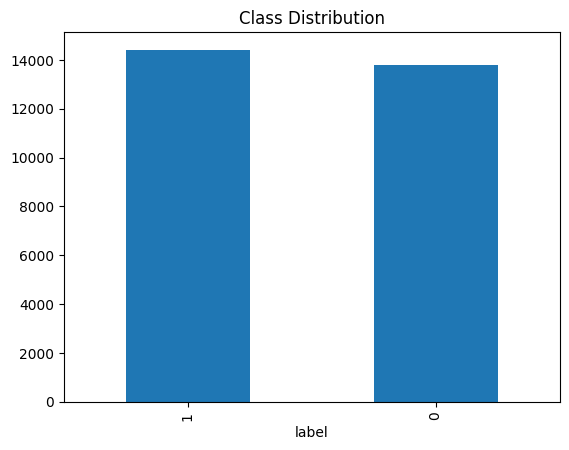

In [ ]:
data['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [ ]:
data['label'].value_counts()

,count
label,
1,14414
0,13796


In [ ]:
data.describe()

,label
count,28210.000000
mean,0.510954
std,0.499889
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data.isnull().count()

,0
text,28210
label,28210
name,28210


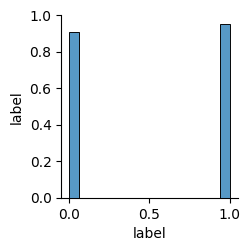

In [ ]:
sns.pairplot(data)

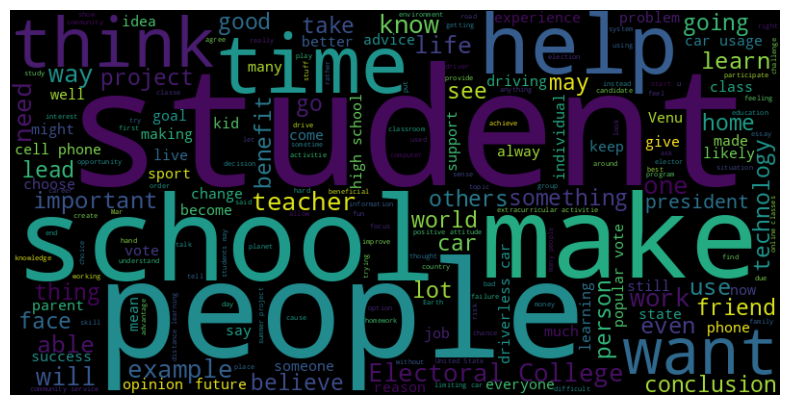

In [ ]:
text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data['text_length'] = data['text'].apply(len)

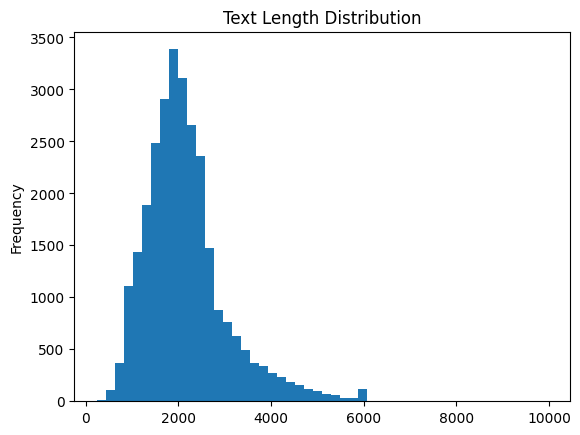

In [ ]:
data['text_length'].plot(kind='hist', bins=50)
plt.title('Text Length Distribution')
plt.show()

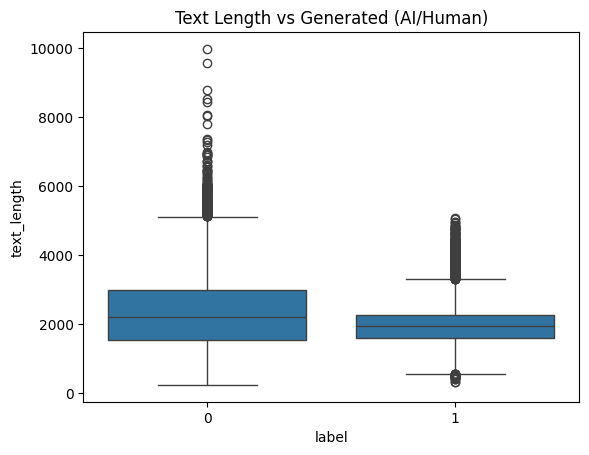

In [ ]:
sns.boxplot(x='label', y='text_length', data=data)
plt.title('Text Length vs Generated (AI/Human)')
plt.show()

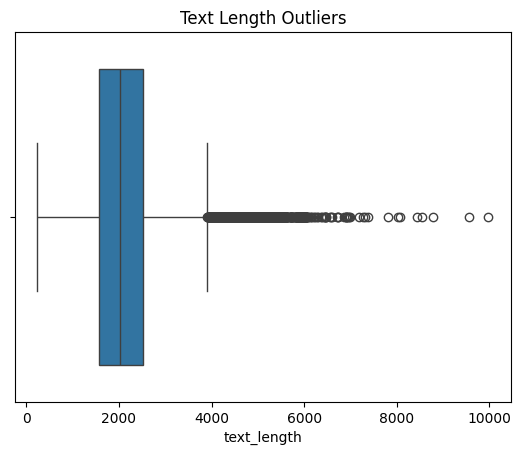

In [ ]:
sns.boxplot(x=data['text_length'])
plt.title('Text Length Outliers')
plt.show()

In [ ]:
Q1 = data['text_length'].quantile(0.25)
Q3 = data['text_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['text_length'] < lower_bound) | (data['text_length'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 1466


In [ ]:
print(f"Percentage of outliers: {len(outliers)/len(data)}")

Percentage of outliers: 0.051967387451258416


In [ ]:
df = data[(data['text_length'] >= lower_bound) & (data['text_length'] <= upper_bound)]

print(f"Original DataFrame size: {data.shape[0]}")
print(f"DataFrame size after removing outliers: {df.shape[0]}")

Original DataFrame size: 28210
DataFrame size after removing outliers: 26744


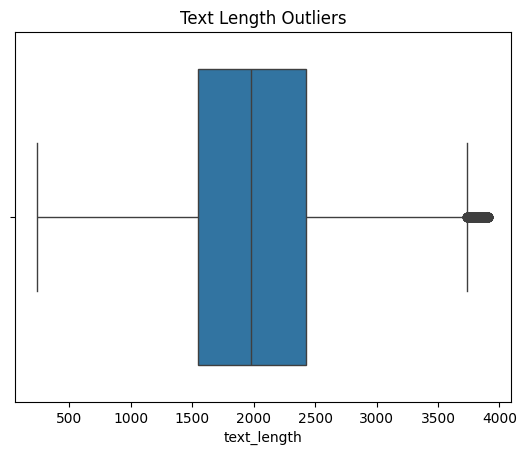

In [ ]:
sns.boxplot(x=df['text_length'])
plt.title('Text Length Outliers')
plt.show()

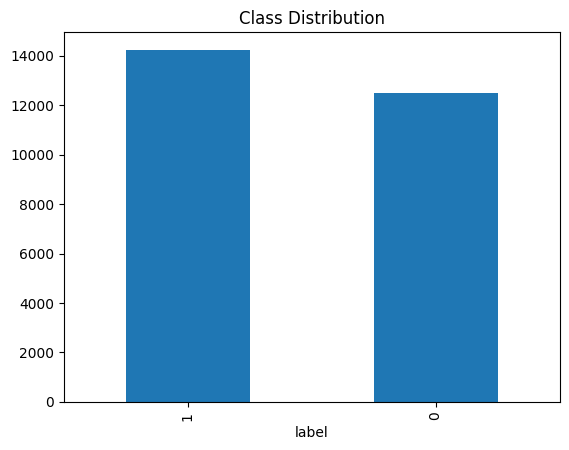

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [ ]:
df['label'].value_counts()

,count
label,
1,14239
0,12505


In [ ]:
df

,text,label,name,text_length
1,Im agree with the Five reasons to keep our des...,0,real,1978
2,"Dear principal,\n\nI think that helping in com...",0,real,921
3,The challenge if exploring venus is that you c...,0,real,2258
4,Do you think a problem should be looked at fro...,0,real,1366
5,Cars! Cars! Cars! Some might say that you cant...,0,real,2656
...,...,...,...,...
28205,I think it's a good idea for schools to have o...,1,fake,1605
28206,Students often debate whether inactivity or s...,1,fake,1541
28207,The Seagoing Cowboys program is an amazing opp...,1,fake,1931
28208,Advantages of Limiting Car Usage\n\nLimiting c...,1,fake,2952


In [ ]:
rows_to_drop = df[df['label'] == 1].sample(1800, random_state=42)

df = df.drop(rows_to_drop.index)

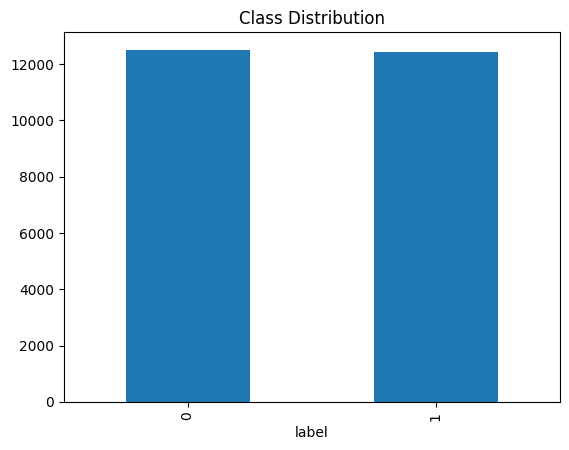

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [ ]:
all_text = ' '.join(df['text'].astype(str))

words = all_text.split()

unique_terms = set(words)
num_unique_terms = len(unique_terms)

print(f'The number of unique terms is: {num_unique_terms}')

The number of unique terms is: 116731


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df["text"])
X_valid = vectorizer.transform(valid_df["text"])
X_test = vectorizer.transform(test_df["text"])

y_train = train_df["label"]
y_valid = valid_df["label"]
y_test = test_df["label"]

vectorizer

TfidfVectorizer(max_features=5000)

In [ ]:
C_list = [0.01, 0.1, 1, 10, 100]

best_acc = 0
best_C = 0

In [ ]:
logistic_regression_best = LogisticRegression(C=0.01)

for C in C_list:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy: {acc}, C: {C}")
    if acc > best_acc:
        logistic_regression_best = model
        best_acc = acc
        best_C = C

print(f"Best accuracy: {best_acc}, Best C: {best_C}")

Accuracy: 0.9393787575150301, C: 0.01
Accuracy: 0.968436873747495, C: 0.1
Accuracy: 0.9869739478957916, C: 1
Accuracy: 0.9889779559118237, C: 10
Accuracy: 0.9869739478957916, C: 100
Best accuracy: 0.9889779559118237, Best C: 10


In [ ]:
# print(vectorizer.vocabulary_)
# res = vectorizer.transform(['is studying pursuit the challenge'])
# print(res)
# logistic_regression_best.predict(res[0])

In [ ]:
best_acc = 0
best_C = 0

best_svc_model = SVC(C=0.01, kernel='linear')

for C in C_list:
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy: {acc}, C: {C}")
    if acc > best_acc:
        best_svc_model = model
        best_acc = acc
        best_C = C

print(f"Best accuracy: {best_acc}, Best C: {best_C}")

Accuracy: 0.9599198396793587, C: 0.01
Accuracy: 0.9894789579158316, C: 0.1
Accuracy: 0.9899799599198397, C: 1
Accuracy: 0.9894789579158316, C: 10
Accuracy: 0.9844689378757515, C: 100
Best accuracy: 0.9899799599198397, Best C: 1


In [375]:
joblib.dump(best_svc_model, 'svc_model.joblib')

['svc_model.joblib']

In [ ]:
joblib.dump(logistic_regression_best, 'logistic_regression_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Random Forest Accuracy: {acc}")

Random Forest Accuracy: 0.9819639278557114


In [ ]:
joblib.dump(random_forest, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"XGBoost Accuracy: {acc}")

XGBoost Accuracy: 0.9874749498997996


In [ ]:
joblib.dump(xgb_model, 'xgb_model.joblib')

['xgb_model.joblib']

In [ ]:
multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(X_train, y_train)
y_pred = multinomialNB_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Naive Bayes Accuracy: {acc}")

Naive Bayes Accuracy: 0.9488977955911824


In [ ]:
joblib.dump(multinomialNB_model, 'multinomialNB_model.joblib')

['multinomialNB_model.joblib']

In [ ]:
k_list = [3, 5, 7]
best_acc = 0
best_k = 0

best_knn_model = KNeighborsClassifier(n_neighbors=3)

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy: {acc}, k: {k}")
    if acc > best_acc:
        best_knn_model = model
        best_acc = acc
        best_k = k

print(f"Best accuracy: {best_acc}, Best k: {best_k}")

Accuracy: 0.9569138276553106, k: 3
Accuracy: 0.9624248496993988, k: 5
Accuracy: 0.9624248496993988, k: 7
Best accuracy: 0.9624248496993988, Best k: 5


In [ ]:
joblib.dump(best_knn_model, 'kNeighbors_classifier_model.joblib')

['kNeighbors_classifier_model.joblib']

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"MLP Accuracy: {acc}")

MLP Accuracy: 0.9884769539078156


In [ ]:
joblib.dump(mlp_model, 'mlp_model.joblib')

['mlp_model.joblib']

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, Best score: {grid.best_score_}")

Best params: {'C': 10}, Best score: 0.9884180105051046


In [ ]:
joblib.dump(grid, 'grid_model.joblib')

['grid_model.joblib']

In [ ]:
model1 = LogisticRegression(C=1)
model2 = RandomForestClassifier(n_estimators=100)
model3 = SVC(kernel='linear', C=1)

ensemble_model = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2), ('svc', model3)], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Ensemble Accuracy: {acc}")

Ensemble Accuracy: 0.9899799599198397


In [ ]:
joblib.dump(ensemble_model, 'ensemble_model.joblib')

['ensemble_model.joblib']

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd

texts = df['text'].tolist()
labels = df['generated'].tolist()

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [ ]:
class AITextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = AITextDataset(train_encodings, train_labels)
val_dataset = AITextDataset(val_encodings, val_labels)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [ ]:
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    evaluation_strategy="epoch",
    output_dir='./results',
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

In [ ]:
eval_results = trainer.evaluate()

print(eval_results)

In [ ]:
def classify_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    return "AI-generated" if predictions == 1 else "Human-written"

new_text = "This is an example of human-written text."
result = classify_text(new_text)
print(result)

In [ ]:
def predict(input_values):
    input_values = [input_values]
    prediction = best_model.predict(input_values)
    return prediction